# clip finetuning with Korean Montage dataset

## Pretrained Model
[koclip/koclip-base-pt](https://huggingface.co/koclip/koclip-base-pt)

## Dataset
[페르소나 기반의 가상 인물 몽타주 데이터](https://www.aihub.or.kr/aihubdata/data/view.do?currMenu=115&topMenu=100&aihubDataSe=realm&dataSetSn=618)

In [1]:
!pip install ftfy regex tqdm
!pip install git+https://github.com/openai/CLIP.git
!pip install datasets
!pip install --upgrade huggingface_hub

  Cloning https://github.com/openai/CLIP.git to /private/var/folders/kt/d6fj76bx5ljfc9cjlml7dl5w0000gn/T/pip-req-build-m8y13tq4
  Running command git clone -q https://github.com/openai/CLIP.git /private/var/folders/kt/d6fj76bx5ljfc9cjlml7dl5w0000gn/T/pip-req-build-m8y13tq4
  Resolved https://github.com/openai/CLIP.git to commit a1d071733d7111c9c014f024669f959182114e33


# Dataset 전처리

In [2]:
m = './dataset/clip/TL/json/M/47.json'

In [26]:
import json

with open(m, 'r', encoding='cp949') as f:
    m_new = json.load(f)

In [69]:
import re
pattern = r'\([^)]*\)'

def sum_feature(m_new):

    feature_list = ['face', 'hairstyle', 'eyes', 'nose', 'mouth']
    new_feature = ''
    for f in feature_list:
        new_feature += m_new['description'][f]['description']
        new_feature += ' '
        new_feature = re.sub(pattern=pattern, repl='', string=new_feature)
        new_feature = new_feature.strip()
    return new_feature

In [34]:
import os 
json_path = './dataset/clip/TL/json/M'
json_list = os.listdir(json_path)
image_path = './dataset/clip/TL/Images/montage'
image_list = os.listdir(image_path)

In [43]:
new_json_list = []
for j in json_list:
    new_json_list.append(int(j.split('.')[0]))

new_image_list = []
for i in image_list:
    new_image_list.append(int(i.split('.')[0]))

In [45]:
len(set(new_json_list).intersection(set(new_image_list)))

330

In [47]:
id_list = list(set(new_json_list).intersection(set(new_image_list)))

In [72]:
import pandas as pd

image_root = './dataset/clip/TL/Images/montage/'
cap_root = './dataset/clip/TL/json/M/'

img_list = []
cap_list = []

for id in id_list:
    img_list.append(image_root+str(id)+'.png')

    with open(cap_root+str(id)+'.json', 'r', encoding='cp949') as f:
        cap = json.load(f)
        cap = sum_feature(cap)
    cap_list.append(cap)


In [78]:
all_list = [img_list, cap_list]

import pandas as pd

df = pd.DataFrame(all_list)

In [81]:
df = df.T

In [83]:
df.columns = ['image', 'caption']

In [85]:
df.to_csv('./dataset/clip/TL/img_cap.csv')

In [ ]:
# image = Image.open(os.path.join(*[self.img_root, self.images[idx]])).convert('RGBA')
# try:
#     new_image = Image.new("RGBA", image.size, "WHITE")
#     new_image.paste(image, (0, 0), image)
# except:
#     new_image = image

In [39]:
import pandas as pd

data = pd.read_csv('./clip_finetuning/img_cap.csv', index_col=0)


In [40]:
data.image= data.image.map(lambda x: './clip_finetuning/Images/montage/' + x.split('/Users/eenzeenee/Downloads/clip_finetuning/Images/')[-1])

In [45]:
data['image'][0]

'/Users/eenzeenee/Downloads/clip_finetuning/Images/montage/8196.png'

In [46]:
data.to_csv('./clip_finetuning/img_cap.csv')

In [47]:
data

,image,caption
0,/Users/eenzeenee/Downloads/clip_finetuning/Ima...,계란형으로 보통 크기의 얼굴인데 앞머리가 이마를 많이 덮고 있다. V자형 턱이 짧고...
1,/Users/eenzeenee/Downloads/clip_finetuning/Ima...,긴 보통 크기의 얼굴이다. 앞머리가 내려져 정확한 유형은 알 수 없지만 오른쪽 이...
2,/Users/eenzeenee/Downloads/clip_finetuning/Ima...,적당한 볼살. 앞머리가 살짝 가려져있어 이마라인을 정확히 알 수 없지만 보이는 부분...
3,/Users/eenzeenee/Downloads/clip_finetuning/Ima...,사각형의 긴 얼굴형에 M자형의 넓은 이마를 가지고 있다. 이마의 골격이 발달되어 눈...
4,/Users/eenzeenee/Downloads/clip_finetuning/Ima...,"왼쪽 볼살이 있는 계란형 같은 얼굴이다. 턱이 둥근형의 느낌이 더 강하다, 앞광대..."
...,...,...
325,/Users/eenzeenee/Downloads/clip_finetuning/Ima...,턱선은 살짝 각져서 날렵하게 둥근 턱끝으로 부드럽게 이어지는 하관인데 매우 갸름해 ...
326,/Users/eenzeenee/Downloads/clip_finetuning/Ima...,얼굴과 턱이 전체적으로 둥근형이며 이마는 앞머리로 인해 알 수 없다. 볼살이 굉장히...
327,/Users/eenzeenee/Downloads/clip_finetuning/Ima...,얼굴은 긴편이며 얼굴이 비대칭이다. 오른쪽은 턱선이 살짝 각져있으며 왼쪽은 턱선이 ...
328,/Users/eenzeenee/Downloads/clip_finetuning/Ima...,얼굴은 계란형이고 이마는 앞머리로 인해 알 수 없다. 그러나 오른쪽 이마 모서...


In [105]:
import os

image_idxs = os.listdir('./clip_finetuning/Images/montage')

In [106]:
data

,image,caption
0,/Users/eenzeenee/Downloads/clip_finetuning/Ima...,계란형으로 보통 크기의 얼굴인데 앞머리가 이마를 많이 덮고 있다. V자형 턱이 짧고...
1,/Users/eenzeenee/Downloads/clip_finetuning/Ima...,긴 보통 크기의 얼굴이다. 앞머리가 내려져 정확한 유형은 알 수 없지만 오른쪽 이...
2,/Users/eenzeenee/Downloads/clip_finetuning/Ima...,적당한 볼살. 앞머리가 살짝 가려져있어 이마라인을 정확히 알 수 없지만 보이는 부분...
3,/Users/eenzeenee/Downloads/clip_finetuning/Ima...,사각형의 긴 얼굴형에 M자형의 넓은 이마를 가지고 있다. 이마의 골격이 발달되어 눈...
4,/Users/eenzeenee/Downloads/clip_finetuning/Ima...,"왼쪽 볼살이 있는 계란형 같은 얼굴이다. 턱이 둥근형의 느낌이 더 강하다, 앞광대..."
...,...,...
325,/Users/eenzeenee/Downloads/clip_finetuning/Ima...,턱선은 살짝 각져서 날렵하게 둥근 턱끝으로 부드럽게 이어지는 하관인데 매우 갸름해 ...
326,/Users/eenzeenee/Downloads/clip_finetuning/Ima...,얼굴과 턱이 전체적으로 둥근형이며 이마는 앞머리로 인해 알 수 없다. 볼살이 굉장히...
327,/Users/eenzeenee/Downloads/clip_finetuning/Ima...,얼굴은 긴편이며 얼굴이 비대칭이다. 오른쪽은 턱선이 살짝 각져있으며 왼쪽은 턱선이 ...
328,/Users/eenzeenee/Downloads/clip_finetuning/Ima...,얼굴은 계란형이고 이마는 앞머리로 인해 알 수 없다. 그러나 오른쪽 이마 모서...


In [107]:
new_data = []
cnt = 0

for idx in image_idxs:
    path = './clip_finetuning/Images/montage/' + idx
    for i in range(len(data)):
        if data.iloc[i, 0] == path:
            new_data.append([path, data.iloc[i,1]])
            cnt += 1

print(cnt)

    

315


In [108]:
new_data = pd.DataFrame(new_data)
new_data.columns = ['image', 'caption']
new_data.to_csv('./clip_finetuning/data.csv')

# clip finetuning

In [2]:
import clip
import torch
from torch import nn
from torch.utils.data import DataLoader
import pandas as pd
from torch import optim
from tqdm import tqdm
import argparse
import os

In [3]:
from PIL import Image
from torch.utils.data import Dataset
import os


class ClipDataset(Dataset):
    def __init__(self, df, preprocess, img_root):
        self.images = df["image"].tolist()
        self.caption = df["caption"].tolist()
        self.preprocess = preprocess
        self.img_root = img_root

    def __len__(self):
        return len(self.caption)

    def __getitem__(self, idx):

        new_image = Image.open(os.path.join(*[self.img_root, self.images[idx]]))
        images = self.preprocess(new_image) # preprocess from clip.load
        caption = self.caption[idx]
        return images, caption

In [4]:
def convert_models_to_fp32(model):
    for p in model.parameters():
        p.data = p.data.float()
        p.grad.data = p.grad.data.float()

In [5]:
CSV_PATH = './clip_finetuning/data.csv'
IMG_ROOT = './clip_finetuning/Images/'
BATCH_SIZE = 16
EPOCH = 5
SAVE_PATH = './clip_finetuning/result'

In [6]:
device = "cuda" if torch.cuda.is_available() else "cpu"  # If using GPU then use mixed precision training.
model, preprocess = clip.load("ViT-B/32", device=device, jit=False)  # Must set jit=False for training
if device == "cpu":
    model.float()
else:
    clip.model.convert_weights(model)  # Actually this line is unnecessary since clip by default already on float16

df = pd.read_csv(CSV_PATH)

dataset = ClipDataset(df, preprocess, IMG_ROOT)
train_dataloader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True, drop_last=True) # Define your own dataloader

loss_img = nn.CrossEntropyLoss()
loss_txt = nn.CrossEntropyLoss()

# optimizer = optim.AdamW(model.parameters(), lr=1e-4, eps=1e-8, weight_decay=1e-2)
# Params used from paper, the lr is smaller, more safe for fine tuning to new dataset
optimizer = optim.Adam(model.parameters(), lr=5e-5, betas=(0.9, 0.98), eps=1e-6, weight_decay=0.2)

model.train()
for epoch in range(EPOCH):
    progress = tqdm(total=len(train_dataloader), desc=f'{epoch+1} Epoch')
    for batch in train_dataloader:
        optimizer.zero_grad()

        list_image, list_txt = batch  # list_images is list of image in numpy array(np.uint8), or list of PIL images

        # omit the Image.fromarray if the images already in PIL format,
        # change this line to images=list_image if using preprocess inside the dataset class
        images = list_image.to(device)
        texts = clip.tokenize(list_txt, truncate=True).to(device)

        logits_per_image, logits_per_text = model(images, texts)

        ground_truth = torch.arange(BATCH_SIZE, dtype=torch.long, device=device)

        # img_loss = loss_img(logits_per_image, ground_truth)
        # img_loss.backward()
        total_loss = (loss_img(logits_per_image, ground_truth) + loss_txt(logits_per_text, ground_truth)) / 2
        total_loss.backward()
        if device == "cpu":
            optimizer.step()
        else:
            convert_models_to_fp32(model)
            optimizer.step()
            clip.model.convert_weights(model)

        progress.update()
        progress.set_postfix({'Total Loss': float(total_loss)})

    print(f'Saving model at the end of {epoch+1} Epoch...')
    torch.save({
        'epoch': epoch,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'loss': total_loss,
    }, os.path.join(*[SAVE_PATH, f"model_{str(epoch+1).zfill(2)}.pt"]))
    print(f'Model saved at {os.path.join(*[SAVE_PATH, f"model_{str(epoch+1).zfill(2)}.pt"])}')

1 Epoch: 100%|██████████| 19/19 [03:16<00:00, 11.34s/it, Total Loss=2.77]

Saving model at the end of 1 Epoch...
Model saved at /Users/eenzeenee/Downloads/clip_finetuning/result/model_01.pt


1 Epoch: 100%|██████████| 19/19 [03:19<00:00, 10.52s/it, Total Loss=2.77]


Saving model at the end of 2 Epoch...
Model saved at /Users/eenzeenee/Downloads/clip_finetuning/result/model_02.pt


3 Epoch: 100%|██████████| 19/19 [03:53<00:00, 11.70s/it, Total Loss=2.78]

Saving model at the end of 3 Epoch...
Model saved at /Users/eenzeenee/Downloads/clip_finetuning/result/model_03.pt


3 Epoch: 100%|██████████| 19/19 [03:56<00:00, 12.43s/it, Total Loss=2.78]


Saving model at the end of 4 Epoch...
Model saved at /Users/eenzeenee/Downloads/clip_finetuning/result/model_04.pt


5 Epoch: 100%|██████████| 19/19 [04:03<00:00, 12.89s/it, Total Loss=2.77]

Saving model at the end of 5 Epoch...
Model saved at /Users/eenzeenee/Downloads/clip_finetuning/result/model_05.pt


# Retrieval

In [8]:
import clip
import torch
from PIL import Image

device = 'cuda' if torch.cuda.is_available() else 'cpu'
model, preprocess = clip.load("ViT-B/32",device=device,jit=False) #Must set jit=False for training
checkpoint = torch.load("/Users/eenzeenee/Downloads/clip_finetuning/result/model_04.pt")

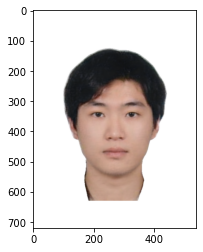

In [11]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
sample = './clip_finetuning/Images/montage/82.png'
sample_img = Image.open(sample)

img_array = np.asarray(sample_img)
plt.imshow(img_array)
plt.show()

# 얼굴 유형이 둥글긴 하나 턱유형에서 약간 끝 부분에 각진 부분이 있어보인다

In [9]:
model.load_state_dict(checkpoint['model_state_dict'])

image = Image.open(sample).convert('RGBA')
new_image = Image.new("RGBA", image.size, "WHITE")
new_image.paste(image, (0, 0), image)
image = preprocess(new_image).unsqueeze(0).to(device)

text = clip.tokenize(['둥근 얼굴에 턱이 각진 유형이다.', '긴 얼굴형에 턱이 뾰족하다.', '계란형의 얼굴로 각진 부분이 없다.']).to(device)

with torch.no_grad():
    image_feature = model.encode_image(image)
    text_features = model.encode_text(text)
    logit_per_image, logit_per_text = model(image, text)
    probs = logit_per_image.softmax(dim=-1).cpu().numpy()

print("Label probs - finetuned-CLIP:", probs)

model, preprocess = clip.load("ViT-B/32",device=device,jit=False) #Must set jit=False for training

# Use these 3 lines if you use default model setting(not training setting) of the clip.
# For example, if you set context_length to 100 since your string is very long during training,
# then assign 100 to checkpoint['model_state_dict']["context_length"]

image = Image.open(sample).convert('RGBA')
new_image = Image.new("RGBA", image.size, "WHITE")
new_image.paste(image, (0, 0), image)
image = preprocess(new_image).unsqueeze(0).to(device)
text = clip.tokenize(['둥근 얼굴에 턱이 각진 유형이다.', '긴 얼굴형에 턱이 뾰족하다.', '계란형의 얼굴로 각진 부분이 없다.']).to(device)


with torch.no_grad():
    image_feature = model.encode_image(image)
    text_features = model.encode_text(text)
    logit_per_image, logit_per_text = model(image, text)
    probs = logit_per_image.softmax(dim=-1).cpu().numpy()
print("Label probs - Vanilla-CLIP:", probs)

Label probs - finetuned-CLIP: [[0.35915533 0.32585344 0.31499118]]
Label probs - Vanilla-CLIP: [[0.26886383 0.16938798 0.56174827]]
